In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [285]:
df_icecream = pd.read_csv('ice_cream.csv')
df_icecream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [286]:
df_icecream.rename(columns = {'DATE': 'date', 'IPN31152N': 'production'}, inplace=True)
df_icecream['date'] = pd.to_datetime(df_icecream.date)
df_icecream.set_index('date', inplace=True)
start_date = pd.to_datetime('2010-01-01')
df_icecream = df_icecream[start_date: ]
df_icecream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


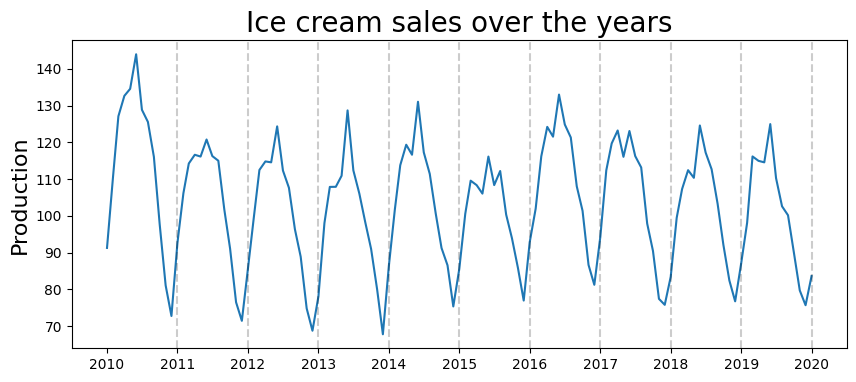

In [287]:
plt.figure(figsize=(10,4))
plt.plot(df_icecream['production'])
plt.title('Ice cream sales over the years', fontsize = 20)
plt.ylabel('Production', fontsize = 16)
for year in range(2011, 2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--',alpha=0.2)

## ACF

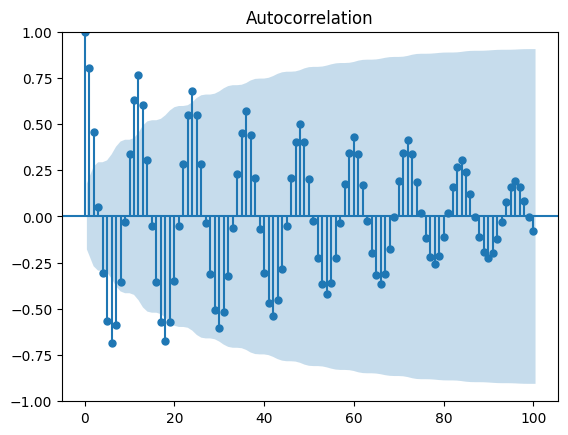

In [288]:
acf_plot = plot_acf(df_icecream['production'], lags = 100)

### Based on decaying ACF, we are likely dealing with Auto Regressive(AR) process

## PACF

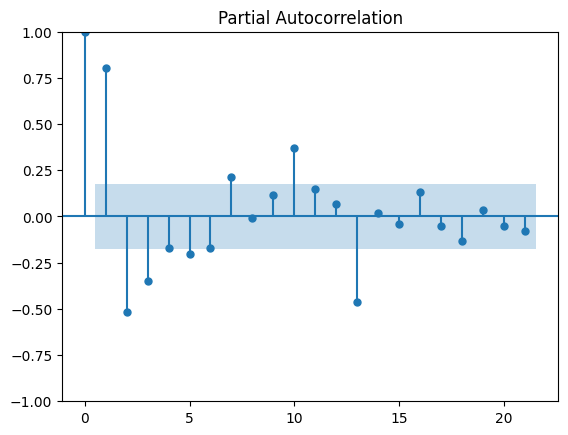

In [289]:
pacf_plot = plot_pacf(df_icecream['production'])

### Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

## On Stock Data

In [290]:
import yfinance as yf

In [291]:
ticker_symbol = 'SPY'
ticker_data = yf.Ticker(ticker_symbol)
ticker_df = ticker_data.history(start='2015-01-01', end='2020-01-01')
ticker_df = ticker_df[['Close']]
ticker_df.head()

,Close
Date,
2015-01-02 00:00:00-05:00,171.568024
2015-01-05 00:00:00-05:00,168.469589
2015-01-06 00:00:00-05:00,166.882767
2015-01-07 00:00:00-05:00,168.962341
2015-01-08 00:00:00-05:00,171.960587


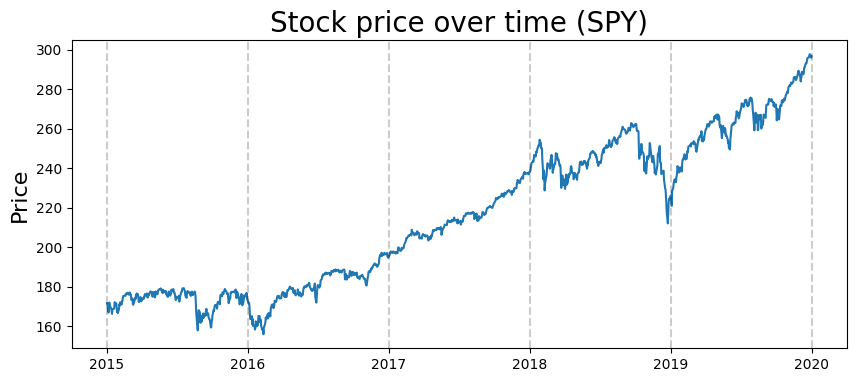

In [292]:
plt.figure(figsize=(10,4))
plt.plot(ticker_df['Close'])
plt.title('Stock price over time (%s)'%ticker_symbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015, 2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--',alpha=0.2)

### Stationarity: Take first difference of this series

In [293]:
first_diffs = ticker_df['Close'].values[1:] - ticker_df['Close'].values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])
ticker_df['first_difference'] = first_diffs
ticker_df.head()

,Close,first_difference
Date,,
2015-01-02 00:00:00-05:00,171.568024,-3.098434
2015-01-05 00:00:00-05:00,168.469589,-1.586823
2015-01-06 00:00:00-05:00,166.882767,2.079575
2015-01-07 00:00:00-05:00,168.962341,2.998245
2015-01-08 00:00:00-05:00,171.960587,-1.378082


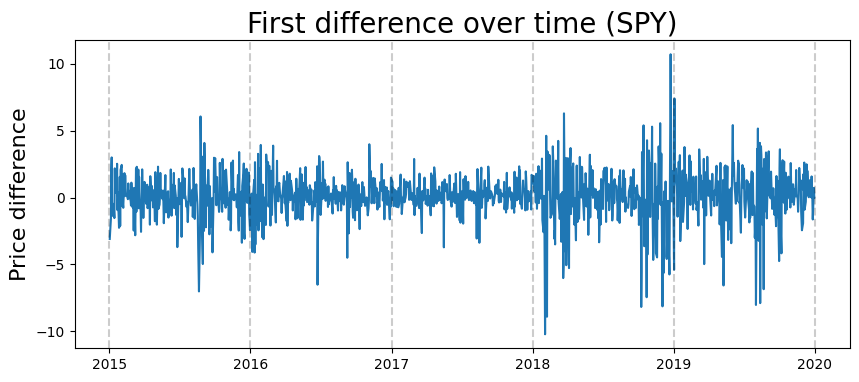

In [294]:
plt.figure(figsize=(10,4))
plt.plot(ticker_df['first_difference'])
plt.title('First difference over time (%s)'%ticker_symbol, fontsize=20)
plt.ylabel('Price difference', fontsize=16)
for year in range(2015, 2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--',alpha=0.2)

## ACF

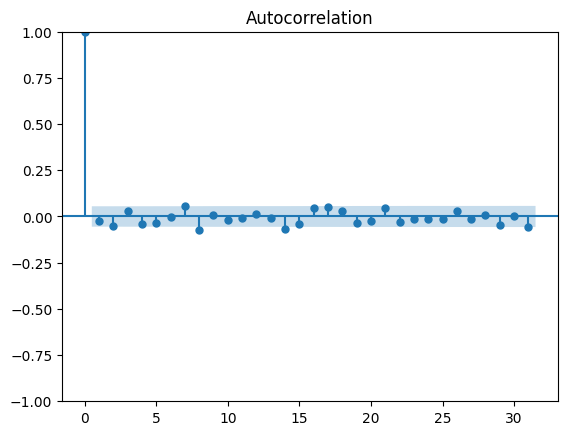

In [295]:
acf_plot = plot_acf(ticker_df.first_difference)

ACF is not that informative

## PACF

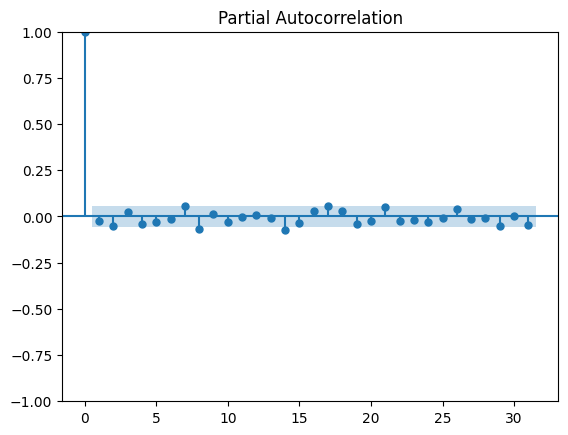

In [296]:
pacf_plot = plot_pacf(ticker_df.first_difference)

### PACF also doesn't tell us much

## Augmented Dickey Fuller Test

In [297]:
from statsmodels.tsa.stattools import adfuller

In [298]:
def generate_ar_process(lags, coefs, length):
  coefs = np.array(coefs)
  series = [np.random.normal() for _ in range(lags)]
  for _ in range(length):
    prev_vals = series[-lags:][::-1]
    new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
    series.append(new_val)
  return np.array(series)

def perform_adf_test(series):
  result = adfuller(series)
  print('ADF Statistic: %f'%result[0])
  print('p-value: %f'%result[1])

## AR(1) Process

### Stationary

ADF Statistic: -3.693649
p-value: 0.004203


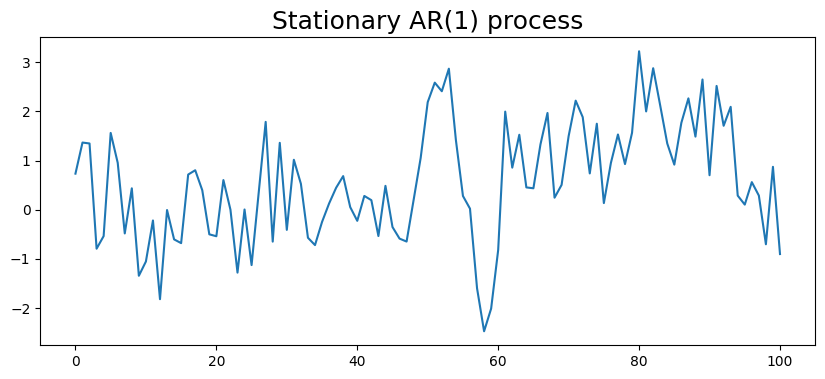

In [299]:
ar1_process = generate_ar_process(1, [.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar1_process)
plt.title('Stationary AR(1) process', fontsize=18)

perform_adf_test(ar1_process)

### Non Stationary

ADF Statistic: -2.287065
p-value: 0.176174


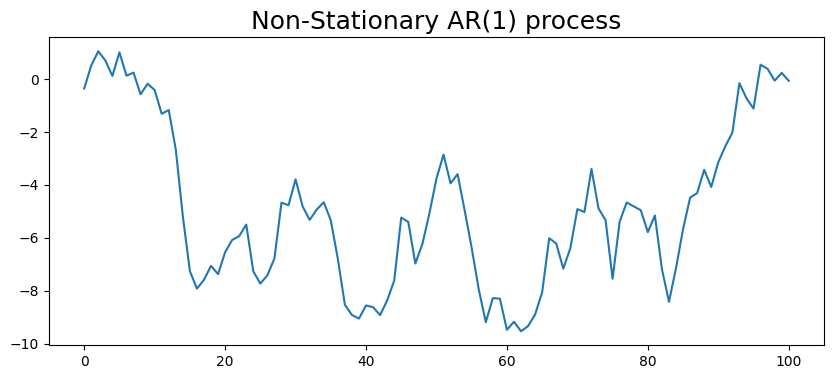

In [300]:
ar1_process_unit_root = generate_ar_process(1, [1], 100)
plt.figure(figsize=(10,4))
plt.plot(ar1_process_unit_root)
plt.title('Non-Stationary AR(1) process', fontsize=18)

perform_adf_test(ar1_process_unit_root)

## AR(2) process

### Stationary

ADF Statistic: -2.569264
p-value: 0.099518


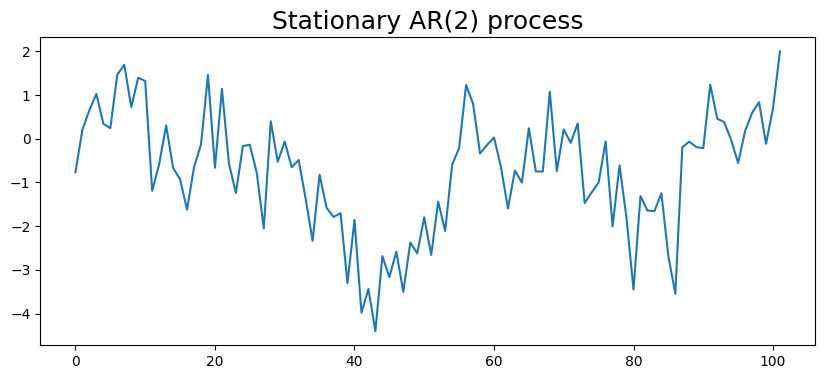

In [301]:
ar2_process = generate_ar_process(2, [.5, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar2_process)
plt.title('Stationary AR(2) process', fontsize=18)

perform_adf_test(ar2_process)

### Non Stationary

ADF Statistic: -1.624641
p-value: 0.470297


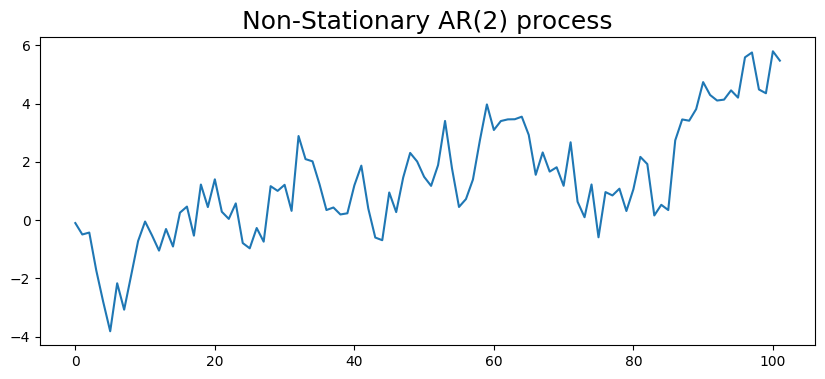

In [302]:
ar2_process_unit_root = generate_ar_process(2, [.7, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar2_process_unit_root)
plt.title('Non-Stationary AR(2) process', fontsize=18)
perform_adf_test(ar2_process_unit_root)